<a href="https://colab.research.google.com/github/cfp2024/-proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "María", "Pedro", "Laura", "Carlos", "Ana", "Luis", "Sofia", "Diego", "Martina"]
  apellidos = ["Gómez", "Pérez", "Rodríguez", "Fernández", "López", "González", "Martínez", "Sánchez", "Ramírez", "Torres"]
  return random.choice(nombres) + " " + random.choice(apellidos)

# Función para generar un DNI aleatorio
def generar_dni():
  return random.randint(10000000, 99999999)

# Generar datos para el DataFrame
data = []
for _ in range(100):
  nombre_apellido = generar_nombre_apellido()
  dni = generar_dni()
  materia = random.choice(materias)
  nota_1er_trimestre = random.randint(1, 10)
  nota_2do_trimestre = random.randint(1, 10)
  nota_3er_trimestre = random.randint(1, 10)
  faltas = random.randint(0, 15)

  data.append([nombre_apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])


# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre y Apellido", "DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

df

,Nombre y Apellido,DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Sofia Sánchez,41238437,Educación Física,8,6,10,9
1,Ana Gómez,12528097,Música,1,2,10,4
2,María Gómez,99686181,Filosofía,2,5,7,11
3,Laura Fernández,22760221,Geografía,2,3,9,8
4,Luis Ramírez,32698281,Inglés,3,4,1,14
...,...,...,...,...,...,...,...
95,María López,33293892,Inglés,5,3,6,2
96,Diego López,15501792,Arte,9,5,5,11
97,Pedro Ramírez,84307927,Educación Física,3,7,1,9
98,Juan Ramírez,21054413,Lengua y Literatura,4,7,1,9


<ipython-input-2-7efe9198558a>:31: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([ax1, ax2], ["Promedio General", "Faltas Totales"])


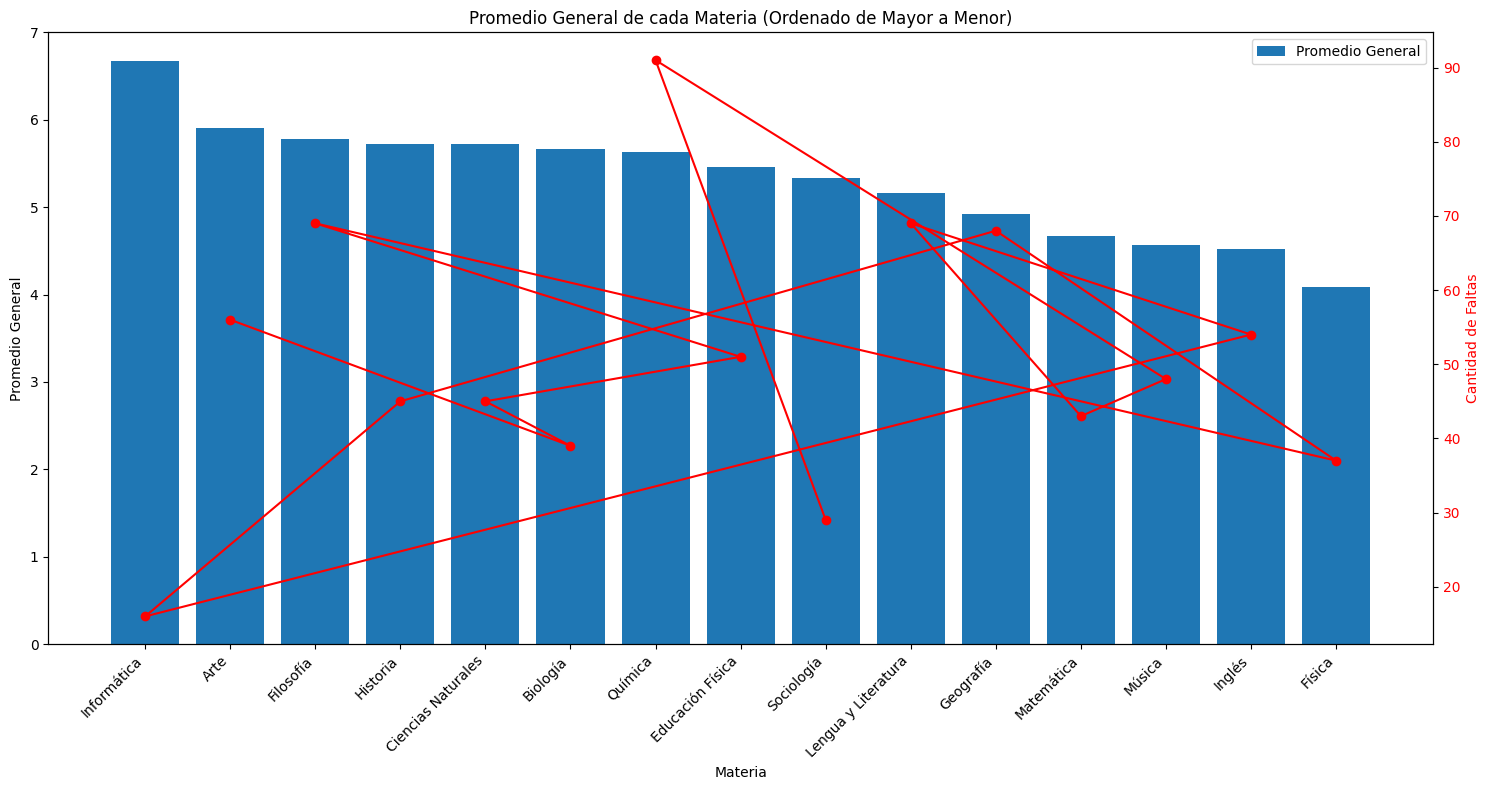

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_materias = df.groupby("Materia Escolar")[[
    "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"
]].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedio_materias_ordenado = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby("Materia Escolar")["Faltas a Clases"].sum()

# Crear el gráfico de barras con el promedio de cada materia
plt.figure(figsize=(15, 8))
ax1 = plt.bar(promedio_materias_ordenado.index, promedio_materias_ordenado.values)
plt.xlabel("Materia")
plt.ylabel("Promedio General")
plt.title("Promedio General de cada Materia (Ordenado de Mayor a Menor)")
plt.xticks(rotation=45, ha="right")

# Crear un segundo eje para las faltas
ax2 = plt.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color="red", marker="o")
ax2.set_ylabel("Cantidad de Faltas", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Agregar leyenda
plt.legend([ax1, ax2], ["Promedio General", "Faltas Totales"])

# Ajustar el gráfico para evitar superposiciones
plt.tight_layout()

plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)